In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
temp_global = pd.read_csv('../data/cleaned/global_temperatures_cleaned.csv')
temp_county = pd.read_csv('../data/cleaned/global_temperatures_by_country_1900_2012_cleaned.csv')
co2_global = pd.read_csv('../data/cleaned/co2_emissions_kt_by_country_clean.csv')

In [5]:
temp_global

,Unnamed: 0,date,land_average_temperature,land_average_temperature_uncertainty
0,36,1753-01-01,2.039,3.478
1,37,1753-02-01,0.715,6.341
2,38,1753-03-01,5.424,2.929
3,39,1753-04-01,8.272,3.177
4,40,1753-05-01,12.186,3.111
...,...,...,...,...
3151,3187,2015-08-01,14.755,0.072
3152,3188,2015-09-01,12.999,0.079
3153,3189,2015-10-01,10.801,0.102
3154,3190,2015-11-01,7.433,0.119


In [6]:
temp_county

,Unnamed: 0,date,average_temperature,average_temperature_unvertainty,country
0,1874,1900-01-01,-3.026,0.538,Åland
1,1875,1900-02-01,-8.063,0.657,Åland
2,1876,1900-03-01,-3.196,0.467,Åland
3,1877,1900-04-01,0.781,0.224,Åland
4,1878,1900-05-01,4.960,0.503,Åland
...,...,...,...,...,...
319939,577448,2012-08-01,18.946,1.127,Zimbabwe
319940,577449,2012-09-01,22.609,0.643,Zimbabwe
319941,577450,2012-10-01,23.482,0.574,Zimbabwe
319942,577451,2012-11-01,24.606,0.532,Zimbabwe


In [7]:
country_top10_temp = ['United States','China','Russia','Japan','India','Germany','United Kingdom','Canada','Italy','France']

In [8]:
temp_county_top10 = temp_county[temp_county['country'].isin(country_top10_temp)]
temp_county_top10.head()

,Unnamed: 0,date,average_temperature,average_temperature_unvertainty,country
54240,98831,1900-01-01,-23.610,0.874,Canada
54241,98832,1900-02-01,-22.475,1.083,Canada
54242,98833,1900-03-01,-16.527,0.821,Canada
54243,98834,1900-04-01,-4.487,1.029,Canada
54244,98835,1900-05-01,3.231,0.865,Canada


In [9]:
temp_county_top10['date']=pd.to_datetime(temp_county_top10['date'])

C:\Users\schue\AppData\Local\Temp\ipykernel_36356\2006895314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_county_top10['date']=pd.to_datetime(temp_county_top10['date'])


In [10]:
temp_county_top10['year']= temp_county_top10['date'].dt.year
temp_county_top10

C:\Users\schue\AppData\Local\Temp\ipykernel_36356\1751133901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_county_top10['year']= temp_county_top10['date'].dt.year


,Unnamed: 0,date,average_temperature,average_temperature_unvertainty,country,year
54240,98831,1900-01-01,-23.610,0.874,Canada,1900
54241,98832,1900-02-01,-22.475,1.083,Canada,1900
54242,98833,1900-03-01,-16.527,0.821,Canada,1900
54243,98834,1900-04-01,-4.487,1.029,Canada,1900
54244,98835,1900-05-01,3.231,0.865,Canada,1900
...,...,...,...,...,...,...
307735,557807,2012-08-01,21.422,0.251,United States,2012
307736,557808,2012-09-01,17.036,0.185,United States,2012
307737,557809,2012-10-01,9.688,0.225,United States,2012
307738,557810,2012-11-01,3.330,0.120,United States,2012


In [11]:
temp_county_top10_pivot = pd.pivot_table(temp_county_top10, index=['country','year'], values='average_temperature', aggfunc=np.mean).reset_index()
temp_county_top10_pivot

C:\Users\schue\AppData\Local\Temp\ipykernel_36356\2060332134.py:1: FutureWarning: The provided callable <function mean at 0x00000161B688F420> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  temp_county_top10_pivot = pd.pivot_table(temp_county_top10, index=['country','year'], values='average_temperature', aggfunc=np.mean).reset_index()


,country,year,average_temperature
0,Canada,1900,-5.018750
1,Canada,1901,-5.052250
2,Canada,1902,-5.170917
3,Canada,1903,-5.302583
4,Canada,1904,-5.905083
...,...,...,...
1125,United States,2008,8.951417
1126,United States,2009,9.137083
1127,United States,2010,9.505583
1128,United States,2011,9.549917


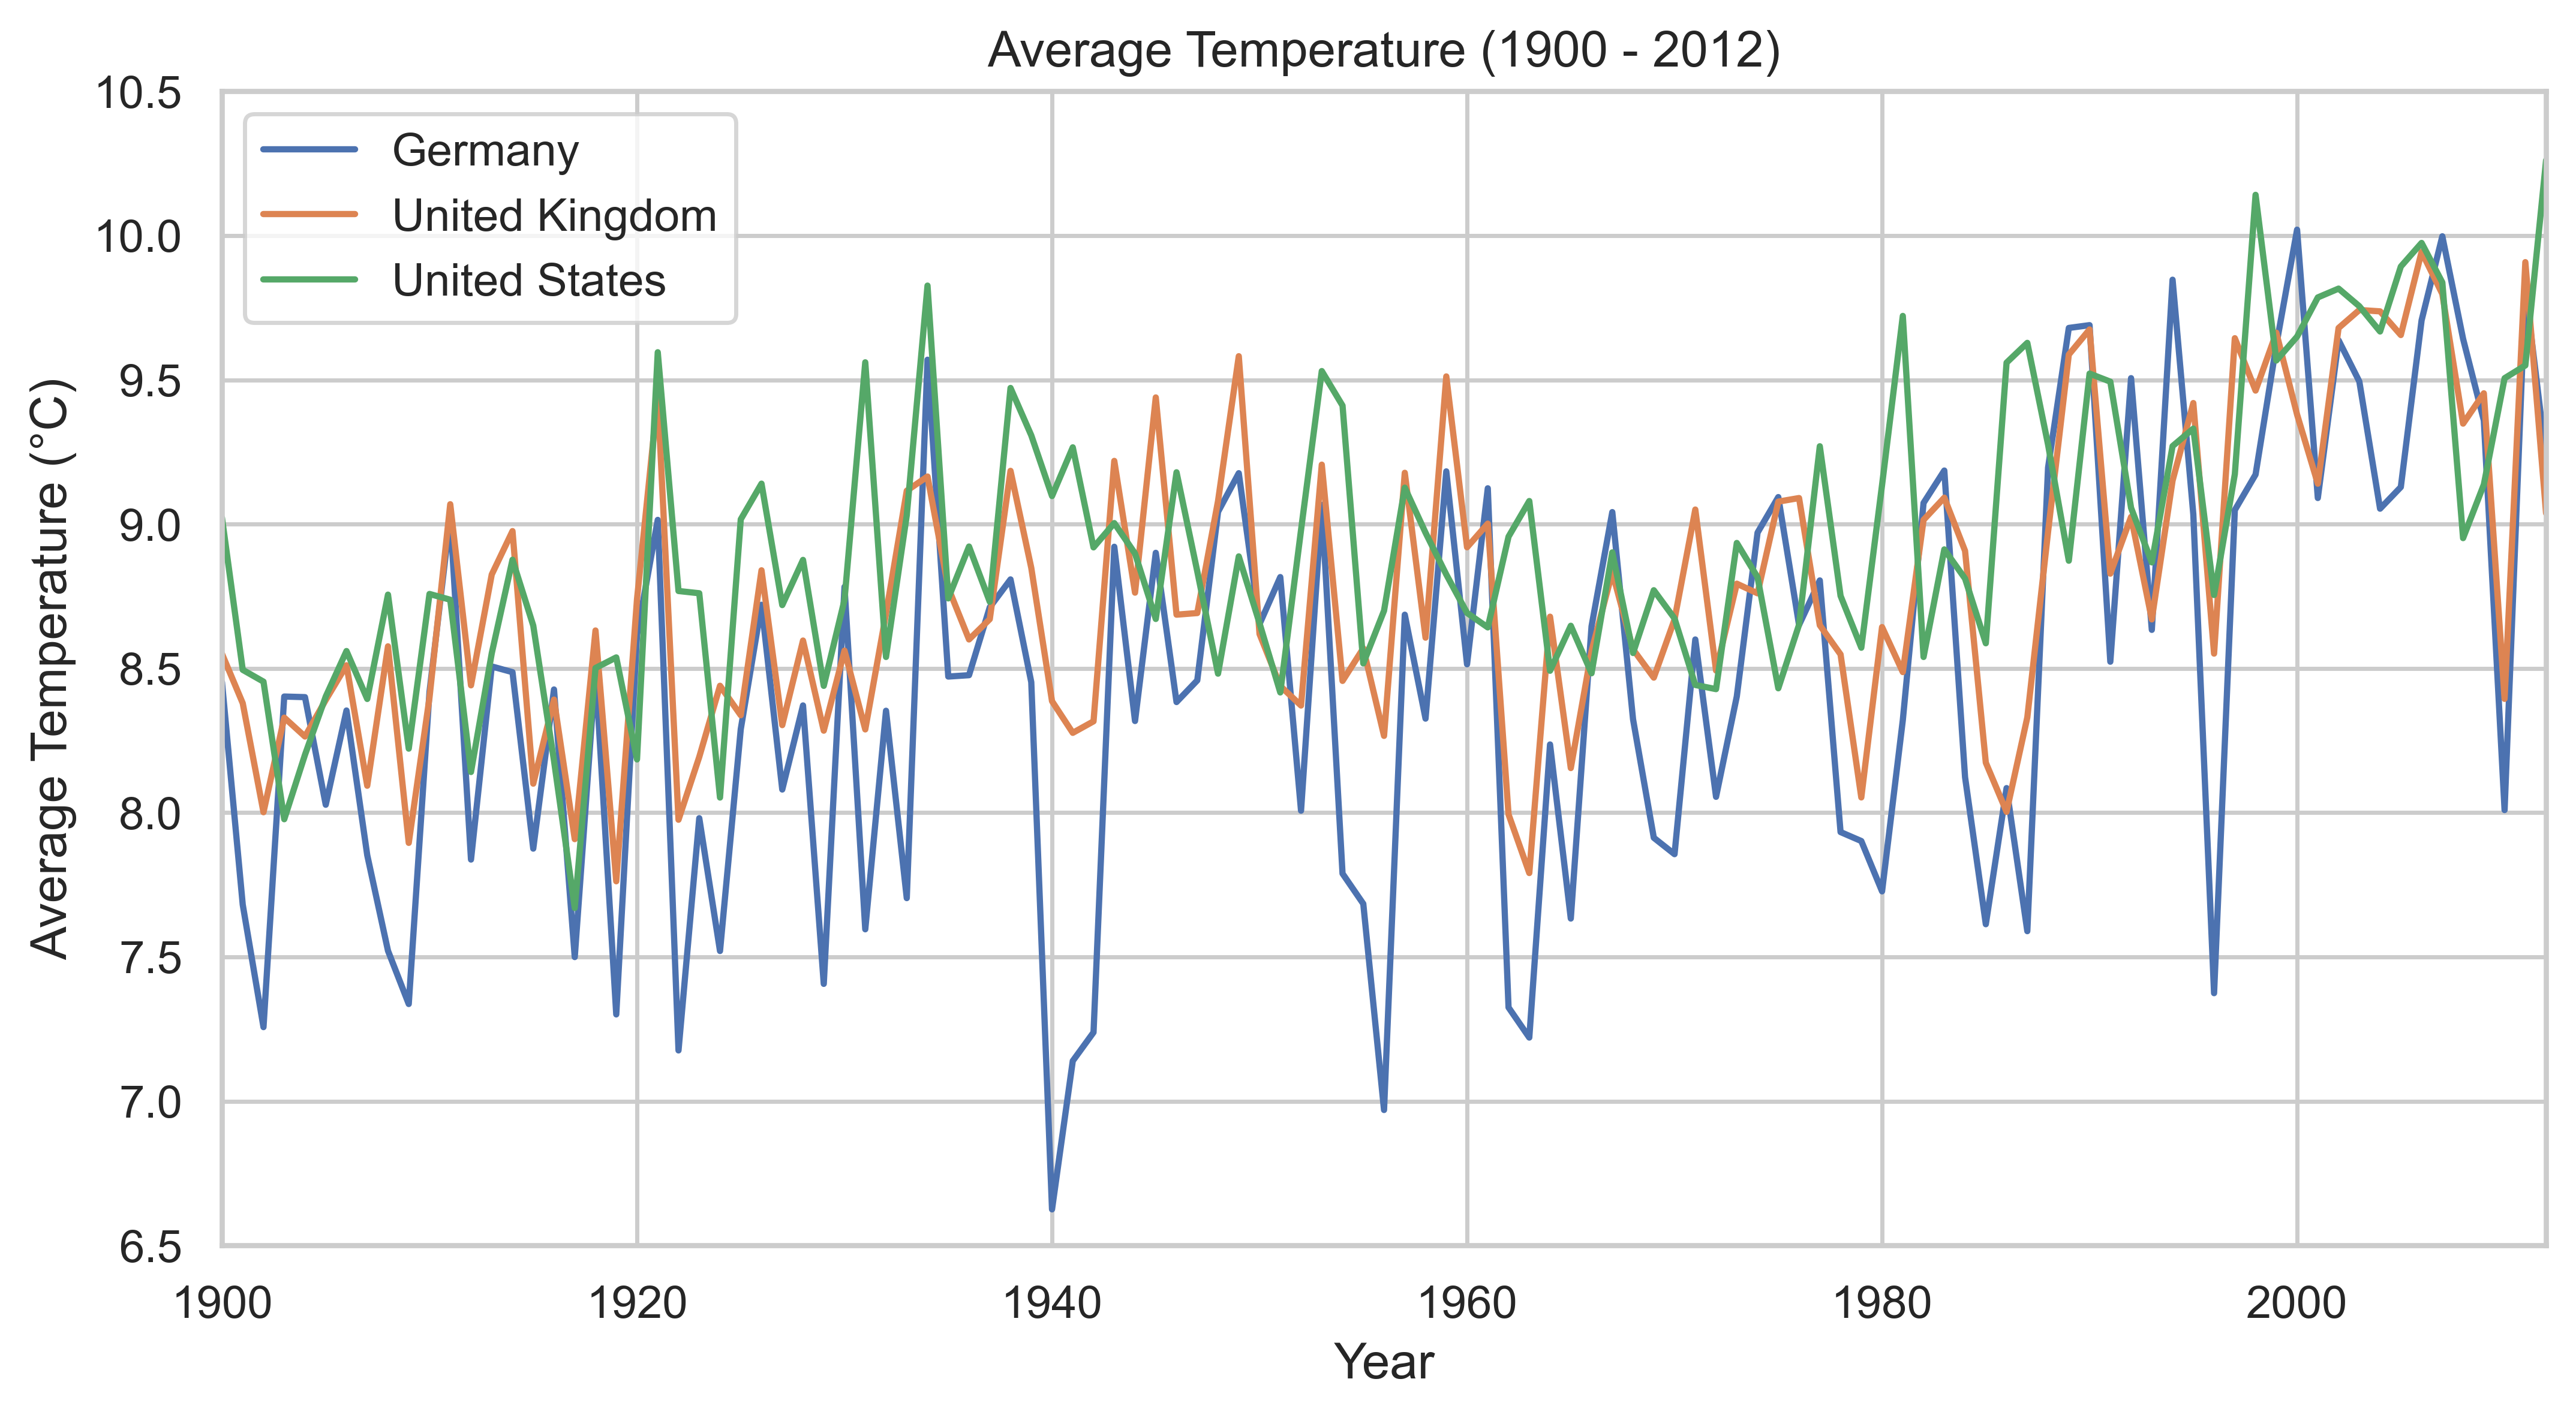

In [124]:
fig,ax = plt.subplots(figsize=(10,5), dpi=500)
sns.lineplot(temp_county_top10_pivot[temp_county_top10_pivot['country'].isin(['Germany','United Kingdom','United States'])], y='average_temperature', x='year', hue='country', legend='full')
plt.xlim(1900, 2012)
plt.ylim(6.5, 10.5)
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
sns.set(style="whitegrid")
ax.set_xlabel('Year')
ax.set_ylabel('Average Temperature (°C)')
ax.set_title('Average Temperature (1900 - 2012)')
legend = plt.legend()
legend.set_title("")
plt.savefig('../resources/pictures/Average Temperature 1900 - 2012.png', format='png')

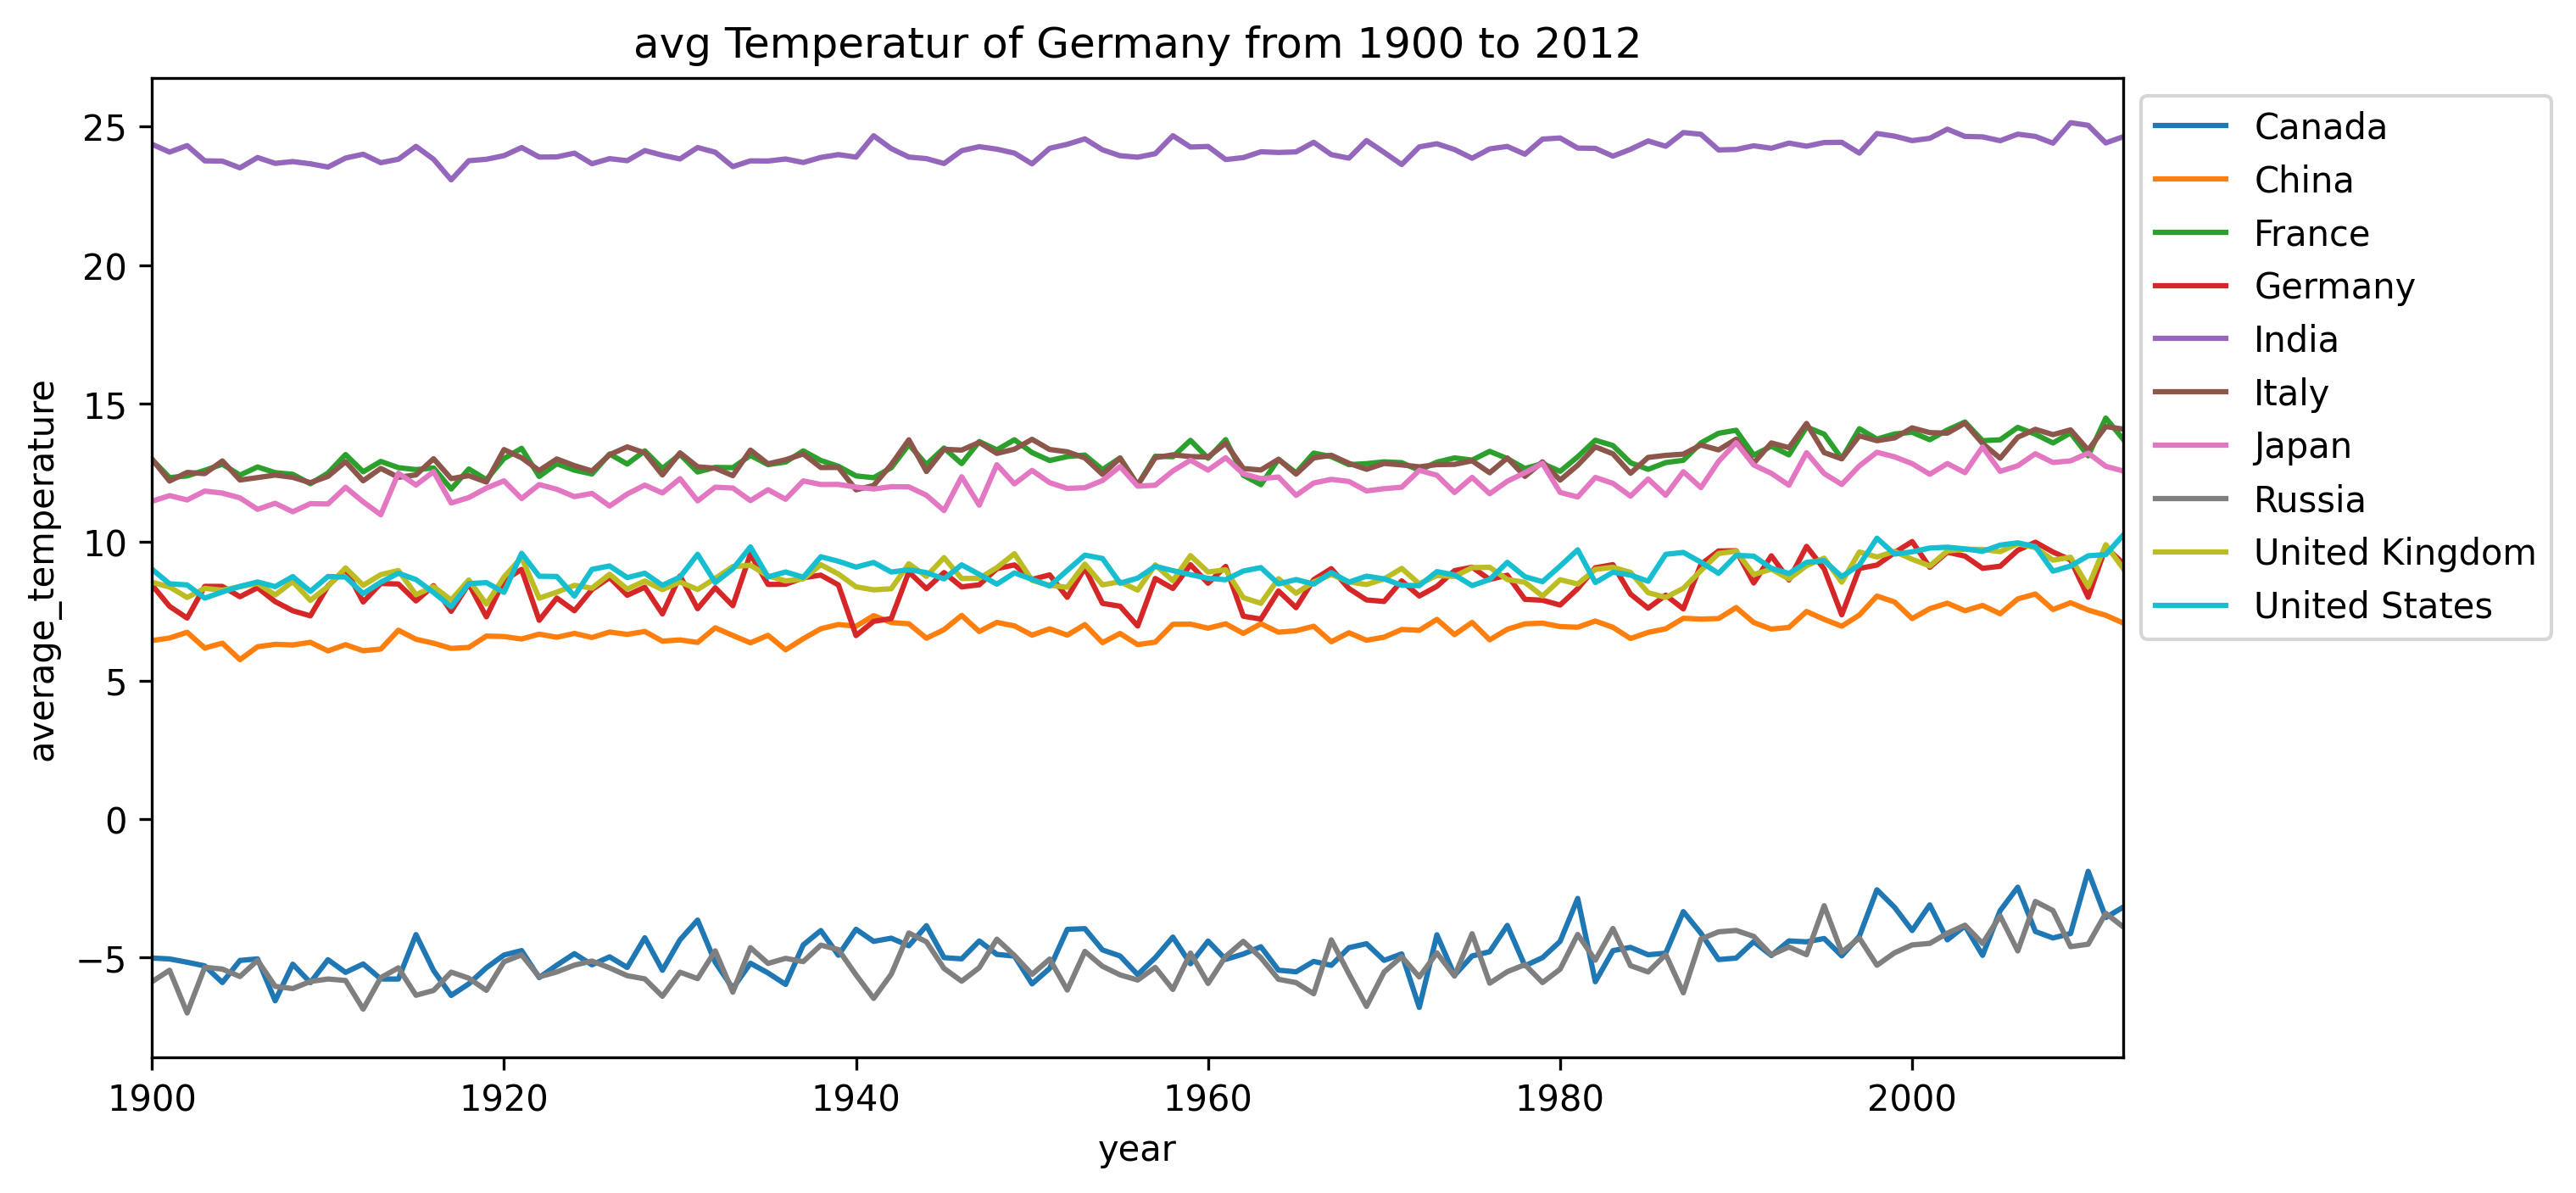

In [36]:
fig,ax = plt.subplots(figsize=(10,5), dpi=300)
sns.lineplot(temp_county_top10_pivot, y='average_temperature', x='year', hue='country', legend=True)
plt.xlim(1900, 2012)
#plt.ylim(4, 12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_title('avg Temperatur of Germany from 1900 to 2012')
plt.savefig('../resources/pictures/test.png', format='png')

In [13]:
temp_global['date']=pd.to_datetime(temp_global['date'])

In [14]:
temp_global['year']= temp_global['date'].dt.year
temp_global

,Unnamed: 0,date,land_average_temperature,land_average_temperature_uncertainty,year
0,36,1753-01-01,2.039,3.478,1753
1,37,1753-02-01,0.715,6.341,1753
2,38,1753-03-01,5.424,2.929,1753
3,39,1753-04-01,8.272,3.177,1753
4,40,1753-05-01,12.186,3.111,1753
...,...,...,...,...,...
3151,3187,2015-08-01,14.755,0.072,2015
3152,3188,2015-09-01,12.999,0.079,2015
3153,3189,2015-10-01,10.801,0.102,2015
3154,3190,2015-11-01,7.433,0.119,2015


In [15]:
temp_global_pivot = pd.pivot_table(temp_global, index=['year'], values='land_average_temperature', aggfunc=np.mean).reset_index()
temp_global_pivot

C:\Users\schue\AppData\Local\Temp\ipykernel_36356\1490844767.py:1: FutureWarning: The provided callable <function mean at 0x00000161B688F420> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  temp_global_pivot = pd.pivot_table(temp_global, index=['year'], values='land_average_temperature', aggfunc=np.mean).reset_index()


,year,land_average_temperature
0,1753,8.388083
1,1754,8.469333
2,1755,8.355583
3,1756,8.849583
4,1757,9.022000
...,...,...
258,2011,9.516000
259,2012,9.507333
260,2013,9.606500
261,2014,9.570667


In [16]:
co2_global = co2_global[co2_global['country_name']=='World']
co2_global.rename(columns={'year':'date'}, inplace=True)
co2_global['date']= pd.to_datetime(co2_global['date'])
co2_global['year']= co2_global['date'].dt.year
co2_global

,country_code,country_name,date,co2_in_kt,year
13592,WLD,World,1960-01-01,9.463838e+06,1960
13593,WLD,World,1961-01-01,9.423934e+06,1961
13594,WLD,World,1962-01-01,9.732506e+06,1962
13595,WLD,World,1963-01-01,1.027450e+07,1963
13596,WLD,World,1964-01-01,1.082025e+07,1964
13597,WLD,World,1965-01-01,1.140258e+07,1965
13598,WLD,World,1966-01-01,1.198832e+07,1966
13599,WLD,World,1967-01-01,1.241335e+07,1967
13600,WLD,World,1968-01-01,1.308735e+07,1968
13601,WLD,World,1969-01-01,1.397601e+07,1969


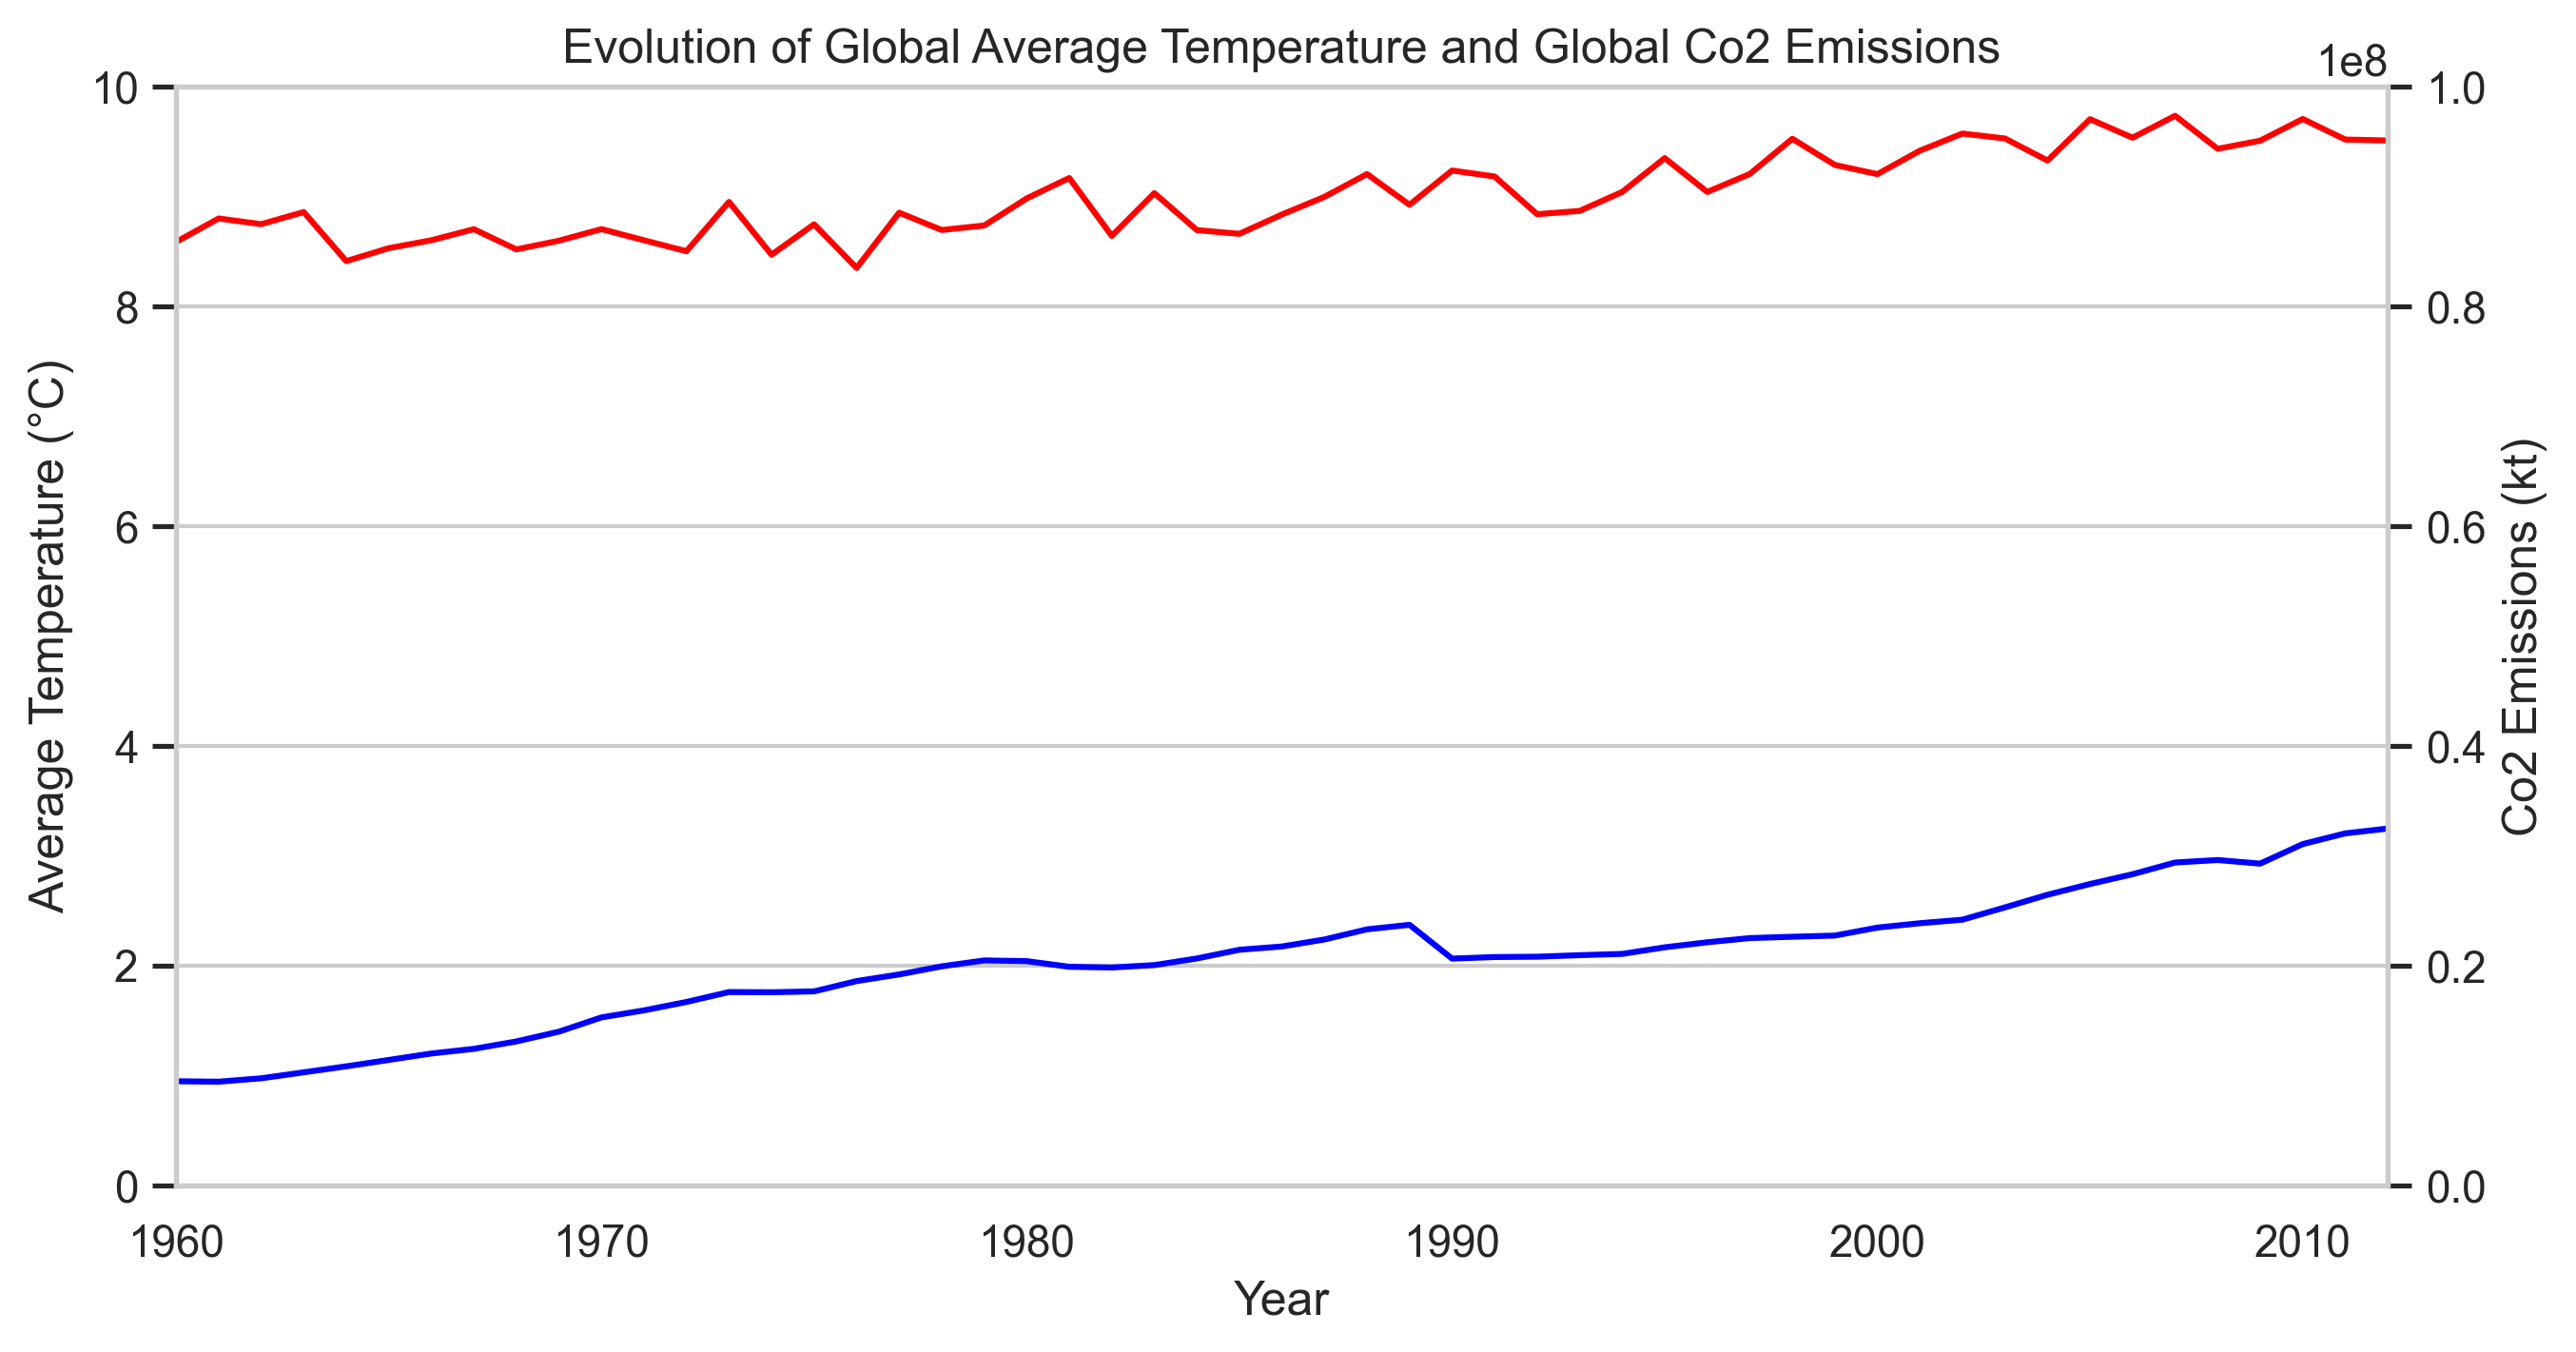

In [106]:
fig,ax = plt.subplots(figsize=(10,5), dpi=300)

ax.grid(False)
ax1 = sns.lineplot(temp_global_pivot, y='land_average_temperature', x='year', color='red')
ax2 = ax1.twinx()
sns.lineplot(data=co2_global, y='co2_in_kt', x='year', ax=ax2, color='blue')
plt.xlim(1960, 2012)
ax.set_xlabel('Year')
ax1.set_ylabel('Average Temperature (°C)')
ax2.set_ylabel('Co2 Emissions (kt)')
ax1.set_ylim(0, 10)
ax2.set_ylim(0, 100000000)
ax.set_title('Evolution of Global Average Temperature and Global Co2 Emissions')
#lines, labels = ax1.get_legend_handles_labels()
#lines2, labels2 = ax2.get_legend_handles_labels()
#ax2.legend(lines + lines2, labels + labels2, loc='upper right')
plt.savefig('../resources/pictures/Global Average Temperature vs Global Co2 Emission.png', format='png')
plt.show()

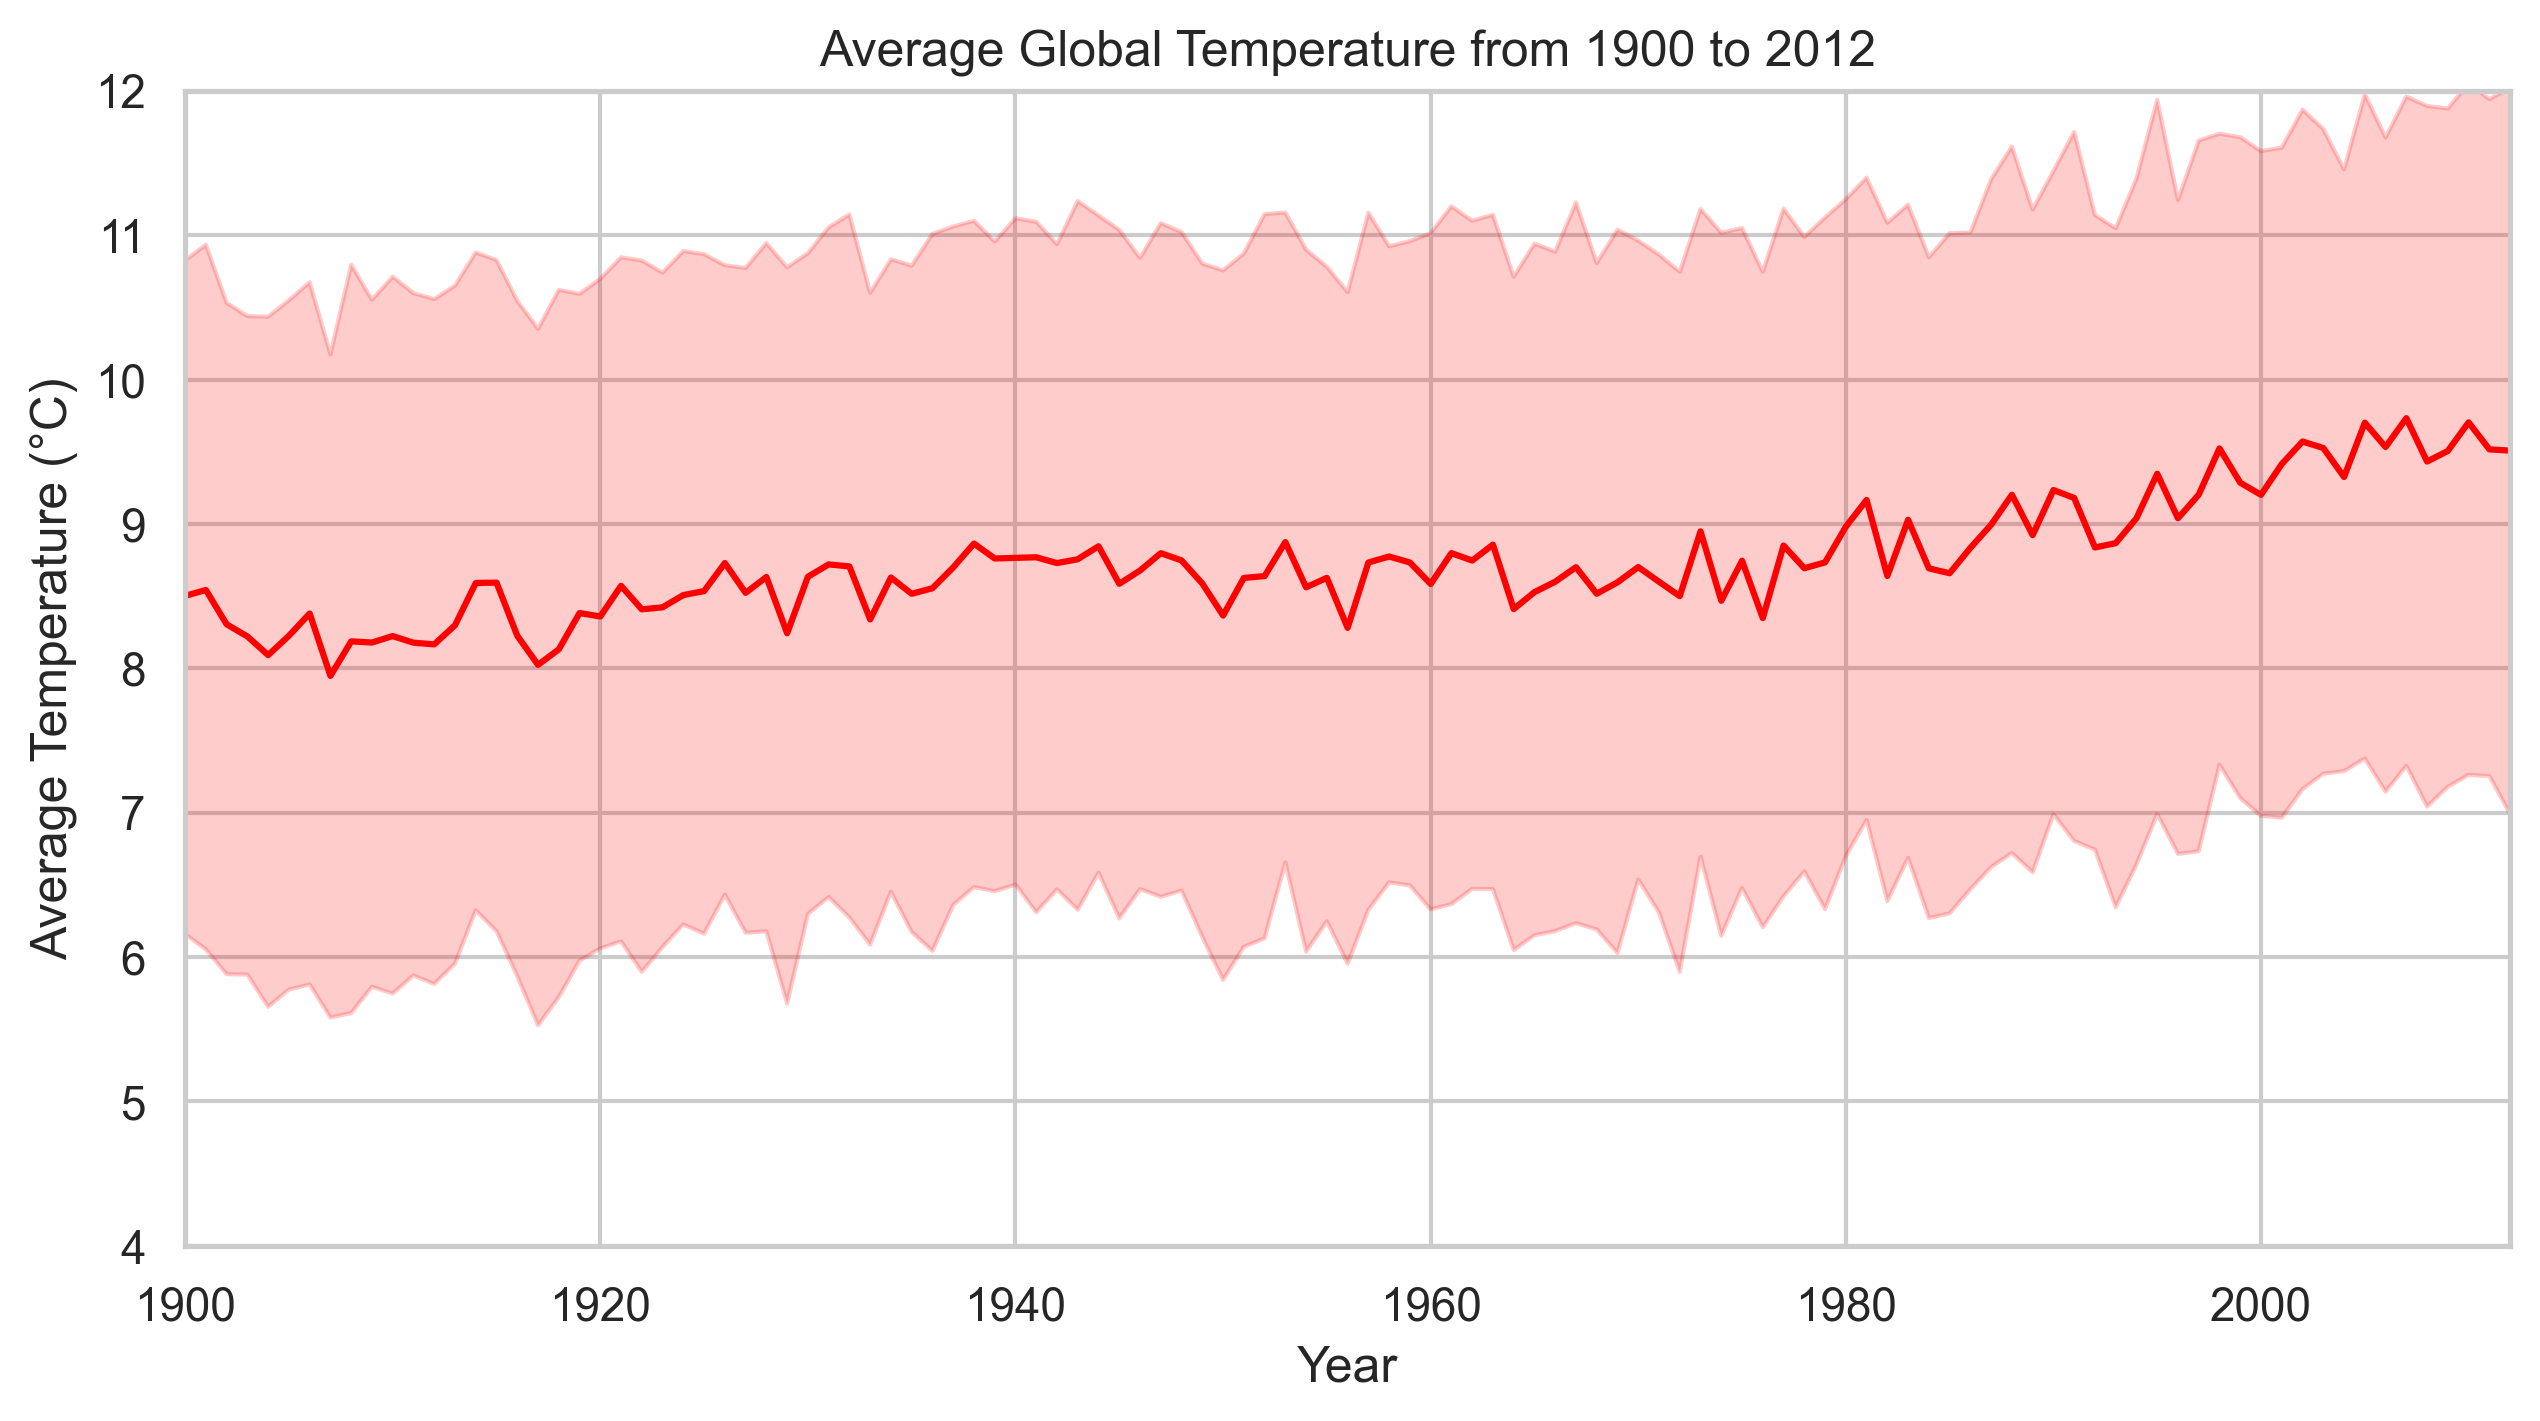

In [109]:
fig,ax = plt.subplots(figsize=(10,5), dpi=300)
sns.lineplot(temp_global, y='land_average_temperature', x='year', color='red')
plt.xlim(1900, 2012)
plt.ylim(4, 12)
ax.set_ylabel('Average Temperature (°C)')
ax.set_xlabel('Year')
ax.set_title('Average Global Temperature from 1900 to 2012')
plt.savefig('../resources/pictures/Average Global Temperature from 1900 to 2012.png', format='png')

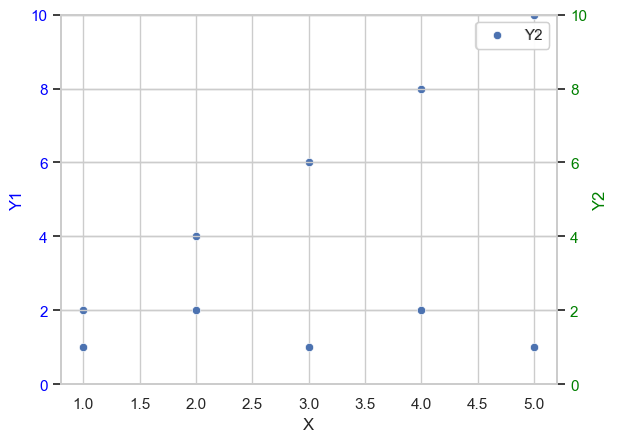

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
# Sample data
data = {'X': [1, 2, 3, 4, 5],
        'Y1': [2, 4, 6, 8, 10],
        'Y2': [1, 2, 1, 2, 1]}
df = pd.DataFrame(data)
# Create a Seaborn scatter plot with two y-axes
fig, ax1 = plt.subplots()
# Plot the first y-axis
sns.scatterplot(x='X', y='Y1', label='Y1', data=df, ax=ax1)
ax1.set_ylabel('Y1', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
# Set the limits of the first y-axis
ax1.set_ylim(0, 10)
# Create the second y-axis sharing the same x-axis
ax2 = ax1.twinx()
# Plot the second y-axis
sns.scatterplot(x='X', y='Y2', label='Y2', data=df, ax=ax2)
ax2.set_ylabel('Y2', color='green')
ax2.tick_params(axis='y', labelcolor='green')
# Set the limits of the second y-axis to match the first y-axis
ax2.set_ylim(0, 10)
# Display the legend
plt.legend()
# Show the plot
plt.show()
